# Simulations

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
# Adjust default matplotlib settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

In [3]:
np.random.seed(0)
n_samples = 200

X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
X = np.array((X1, X2)).T

noise = np.random.normal(0, 1, n_samples)

temp = np.exp(2*X1) + np.exp(2*X2) + noise
y = (temp > np.median(temp)).astype(int)


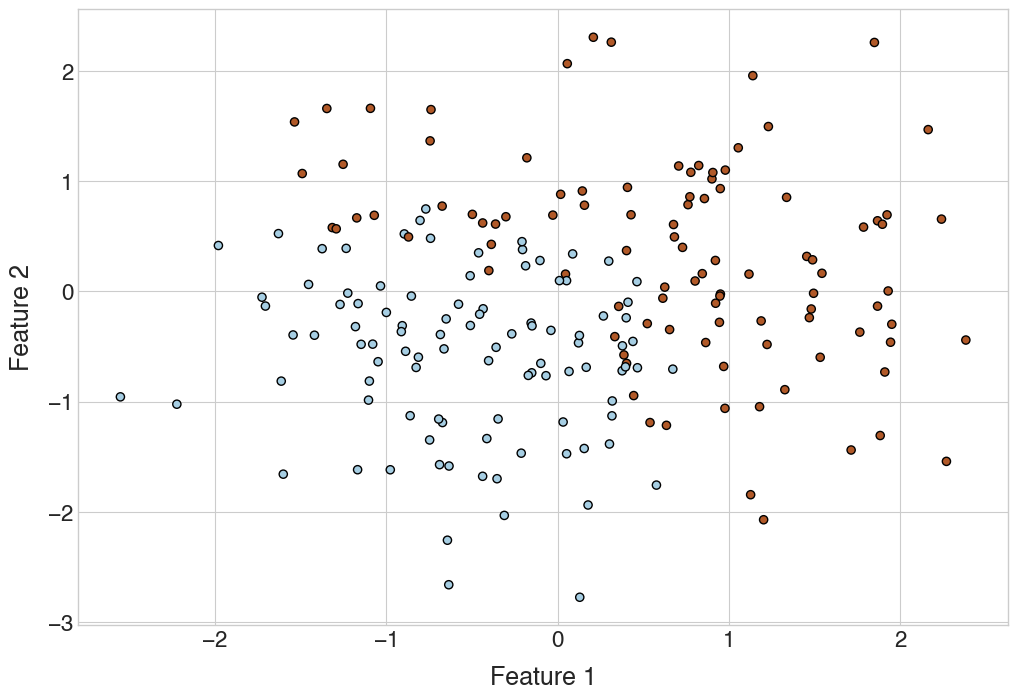

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='Paired',
            edgecolors='black', s=35)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');
# Save as svg
plt.savefig('sim_data.svg', format='svg')

In [5]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=0)

In [6]:
# Fit standard logistic regression (d=1)
scaler = StandardScaler(with_mean=True, with_std=True)
log_reg = LogisticRegression(C=1e10, solver='liblinear', max_iter=1000)
pipe = Pipeline(steps=[('scaler', scaler),
                       ('log_reg', log_reg)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=10000000000.0, max_iter=1000,
                                    solver='liblinear'))])

In [7]:
# Create mesh grid
x_min, x_max = X_train[:, 0].min() - .25, X_train[:, 0].max() + .25
y_min, y_max = X_train[:, 1].min() - .25, X_train[:, 1].max() + .25

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
x_in = np.c_[xx.ravel(), yy.ravel()]

In [8]:
y_pred = pipe.predict(x_in)
y_pred = y_pred.reshape(xx.shape)

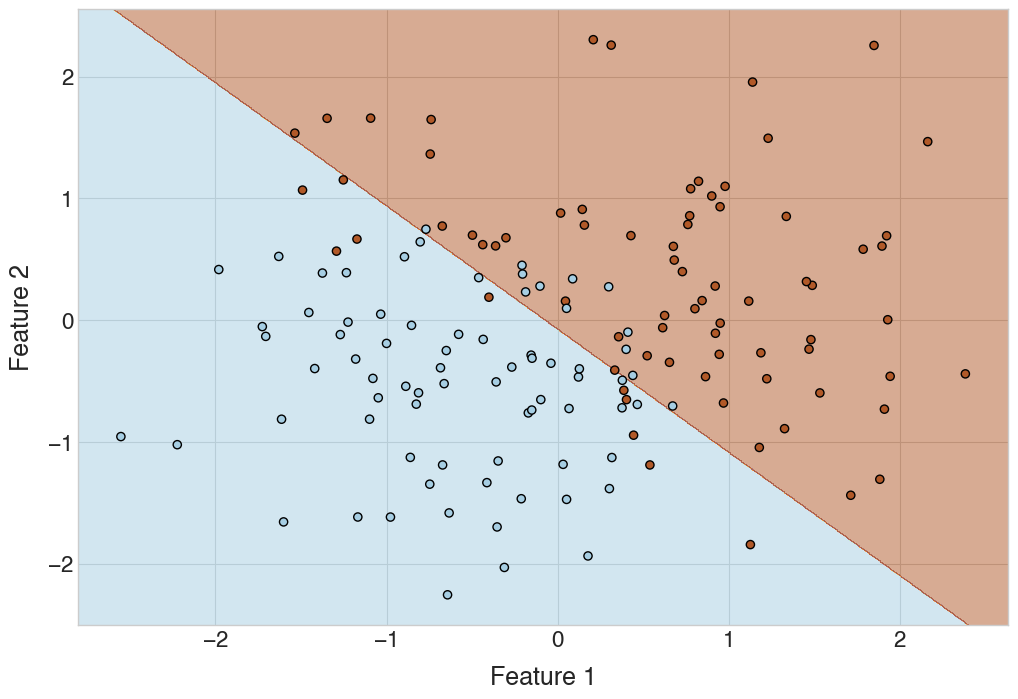

In [9]:
plt.figure(figsize=(12,8))
plt.contourf(xx, yy, y_pred, cmap='Paired', alpha=.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=35, cmap='Paired',
            edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Save as svg
plt.savefig('decb_logreg.svg', format='svg');

In [10]:
# Create mesh grid
x_min, x_max = X_train[:, 0].min() - .25, X_train[:, 0].max() + .25
y_min, y_max = X_train[:, 1].min() - .25, X_train[:, 1].max() + .25

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10000), np.linspace(y_min, y_max, 1000))
x_in = np.c_[xx.ravel(), yy.ravel()]

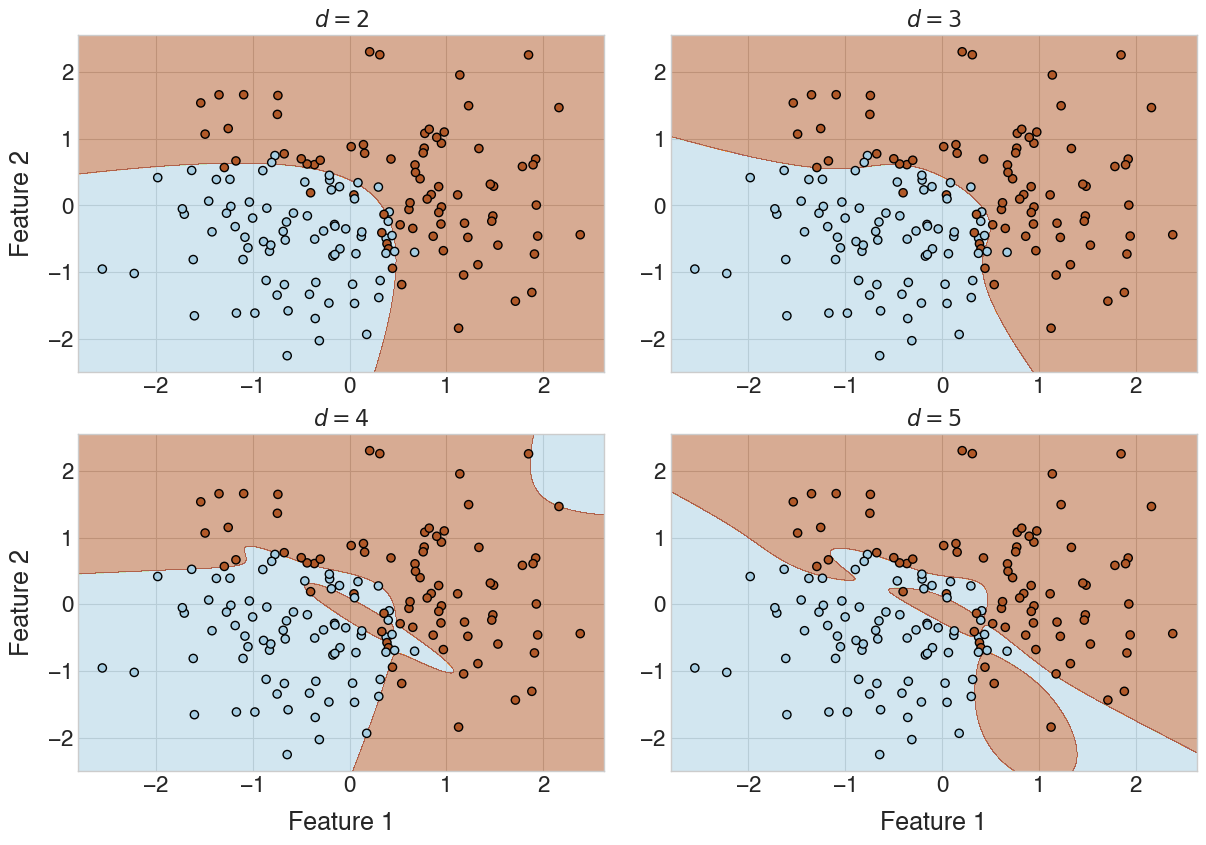

In [11]:
# Plot decision boundary for different d
scaler = StandardScaler(with_mean=True, with_std=True)
log_reg = LogisticRegression(C=1e10, solver='liblinear', max_iter=1000)

_, ax = plt.subplots(2, 2, figsize=(12,8))
_.tight_layout(h_pad=2.0)
ax = ax.flatten()

for i, d in enumerate(range(2, 6)):
  poly = PolynomialFeatures(degree=d, include_bias=True)
  pipe = Pipeline(steps=[('poly', poly), ('scaler', scaler),
                         ('log_reg', log_reg)])
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(x_in) \
               .reshape(xx.shape)

  ax[i].contourf(xx, yy, y_pred, cmap='Paired', alpha=.5)
  ax[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=35, cmap='Paired',
            edgecolors='black')
  ax[i].set_xlim(xx.min(), xx.max())
  ax[i].set_ylim(yy.min(), yy.max())
  ax[i].set_title(f'$d={d}$', size=16)

  if i in {2,3}:
    ax[i].set_xlabel('Feature 1')
  if i in {0,2}:
    ax[i].set_ylabel('Feature 2')
    
# Save as svg
#plt.savefig('decb_polylogreg.svg', format='svg', bbox_inches='tight')

In [12]:
# Evaluate training and test accuracy for degree d
scaler = StandardScaler(with_mean=True, with_std=True)
log_reg = LogisticRegression(C=1e10, solver='liblinear', max_iter=1000)

scores = {}

for d in range(1, 11):
  poly = PolynomialFeatures(degree=d, include_bias=False)
  pipe = Pipeline(steps=[('poly', poly), ('scaler', scaler),
                          ('log_reg', log_reg)])
  pipe.fit(X_train, y_train)
  score_train = pipe.score(X_train, y_train)
  score_test = pipe.score(X_test, y_test)

  scores[d] = {'acc_train': score_train,
               'acc_test': score_test}

In [13]:
df_scores = pd.DataFrame(scores).T
df_scores

,acc_train,acc_test
1,0.853333,0.84
2,0.906667,0.90
3,0.926667,0.94
4,0.960000,0.88
5,0.966667,0.84
6,0.960000,0.84
7,0.966667,0.86
8,0.966667,0.84
9,0.966667,0.86
10,0.966667,0.84


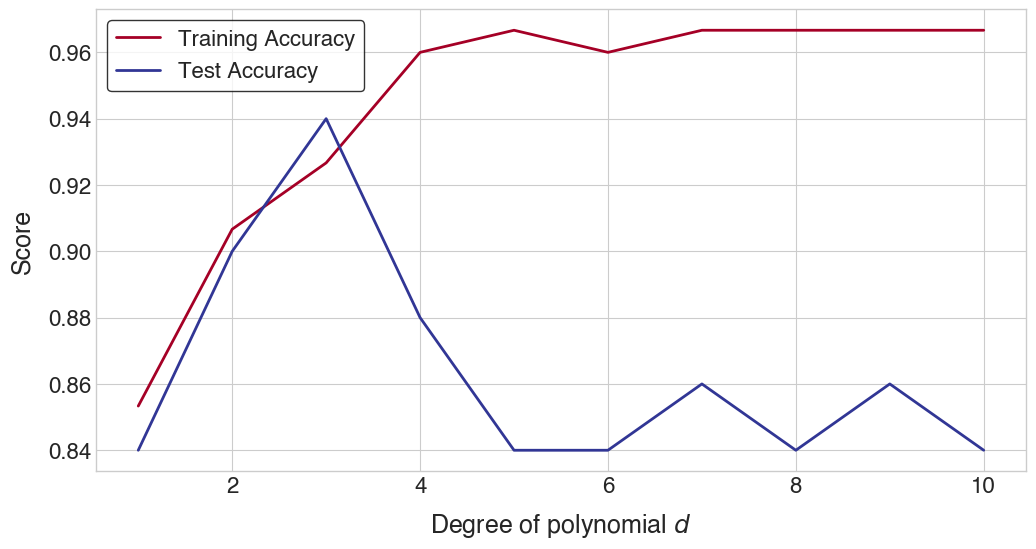

In [14]:
df_scores.plot(colormap='RdYlBu', figsize=(12,6), 
               xlabel='Degree of polynomial $d$', ylabel='Score')
plt.legend(['Training Accuracy', 'Test Accuracy'])
# Save as svg
plt.savefig('polylogreg_metrics.svg', format='svg')